# 1.2.3 Assignment 1 Problem (20 points): (Almost) True riffle shuffle
As you can see, this isn't very random! One of the problems is that we are always assuming that the cards fall alternatingly from each split part of the deck. In reality, (a) the two parts do not usually have the same number of cards and (b) several cards can fall to the pile from one part before cards fall from the other pile. 

**Problem:** Write a Python function to perform a real shuffle, making use of facts (a) and (b). Don't employ any randomness; rather, criterion (b) applies simply because of (a): if the size of part 1 is double the size of part 2, then two cards will fall from part 1 before one card falls from part 2, etc. For more general splits the patterns are more complicated. Applying this function five or six times should leave a deck almost indistinguishable from randomly ordered (we'll follow up on how to test the randomness later in the course).

In [0]:
#so the way ud want to do it is split a list of 52 into a x number or random lists
#then add a random number of cards to the main deck every time till the lists are depleted
#you may interate this process to make the list truly indistinguishable

In [0]:
import numpy as np

In [0]:
"""
This function performs a riffle shuffle on a deck, given
how many cards to cut into the other half of the deck to
be riffled with. If the two halves are uneven, it puts 
down more cards from the bigger side at a time, according
to how many times it is larger than the other side.
Params:
 deck: A list representing the deck, each element a card.
 leftSize: How many cards to peel off to one of the two
 halves to be riffled together.
"""
def unevenCardShuffle(deck, leftSize):
  # Peel it off
  deckLeft = deck[:leftSize]
  deckRight = deck[leftSize:]
  #Swap the bigger deck to the right
  if len(deckLeft) > len(deckRight):
     deckLeft, deckRight = deckRight, deckLeft
  #Find how many times larger the bigger deck is.
  rightOverLeft = len(deckRight)//len(deckLeft)
  
  newDeck = []
  
  #Riffle it.
  while len(deckLeft) > 0:
    newDeck.append(deckLeft.pop(0))
    for index in range(rightOverLeft):
      newDeck.append(deckRight.pop(0))
      
  newDeck = newDeck + deckRight
  return newDeck


In [29]:
#Watch it work
numShuffles = 9
numCardsOnOneSide = 6

deck = list(range(52))
for index in range(numShuffles):
  deck = unevenCardShuffle(deck, numCardsOnOneSide)
print("The Shuffled Deck:", deck)
print("Deck Length is:", len(deck))

The Shuffled Deck: [0, 31, 7, 27, 32, 6, 33, 12, 29, 4, 11, 34, 16, 9, 15, 35, 2, 13, 19, 36, 17, 22, 37, 20, 25, 38, 23, 39, 26, 40, 28, 5, 30, 10, 14, 18, 21, 24, 3, 8, 1, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Deck Length is: 52


# 1.3.2. Assignment 1 Problems (30 points): Generalizing Arnold's Map

Suppose that Arnold's map was instead 

$x_{t+1}=p x_t+q y_t\;{\rm mod}\; N;\quad y_{t+1}=r x_t+s y_t\;{\rm mod}\; N,$

where $p,q,r,s\in\mathbb{Z}$. 

**Problem (15 points):** Assuming that $p,q,r,s\in\{1,2\}$ (i.e. 16 combinations), modify the routine above to determine the number of timesteps required to restore the cat image. Do at most 360 shuffle steps. Comment on the output.

We can describe the $x$ and $y$ values of the pixel as a two-dimensional vector, and the action of the cat map as a matrix operating on this vector:
\begin{equation}
\begin{pmatrix}
x\cr y\cr
\end{pmatrix}_{t+1}
=\begin{pmatrix}
p & q\cr r & s\cr
\end{pmatrix}
\begin{pmatrix}
x\cr y\cr
\end{pmatrix}_t\;\mbox{mod}\;N.
\end{equation}
Thus, the values after $n$ steps are given by 
\begin{equation}
\begin{pmatrix}
x\cr y\cr
\end{pmatrix}_{t+n}
=\begin{pmatrix}
p & q\cr r & s\cr
\end{pmatrix}^n
\begin{pmatrix}
x\cr y\cr
\end{pmatrix}_t\;\mbox{mod}\;N.
\end{equation}
Wait! Is that really true? Is it ok to take a high power and only apply the mod at the end? Or do we need to apply the mod at each time step? Let's check: 12 mod $45=12$ and $12^2$ mod $45=9$; now $12^3$ mod $45=18$ and $9\cdot 12$ mod $45=18$. So it seems to work for this example! So under the assumption that this is all halal, the goal is to find $T$ such that 
\begin{equation}
\begin{pmatrix}
p & q\cr r & s\cr
\end{pmatrix}^n\;\mbox{mod}\;N=I\quad\leftrightarrow\quad M^n\;\mbox{mod}\;N=I,
\end{equation}
where $I$ is the identity and $M$ is the matrix of interest.

**Problem (15 points):** Write a routine to effect $n$ successive multiplications of $M$ with itself, to see if there is a value of $n$ that returns the identity matrix. How do the results compare to those in the previous question? If requested many more than 350 shuffles, would the results be any different?

In [30]:
##Q1
import numpy as np

"""
This function scrambles an input matrix's positions
according to a linear map inputted by the player

It reads the matrix entry's position as an (x, y) vector, 
and scrambles it by matrix multiplication.

Original code by Prof. Feder, adjusted by us.

Parameters:
 square: The matrix to be scrambled.
 p: The first element of the 2x2 array (top left)
 q: Second element (top right)
 r: Third element (bottom left)
 s: Fourth element (bottom rigt)
"""

def catmap3(square, p, q, r, s):

  nx,ny = square.shape[0:2]
  assert (nx == ny & ny > 1)
  result = square.copy()
  for x in range(nx):
    for y in range(ny):
      xx = p*x + q*y
      yy = r*x + s*y
      result[x,y] = square[xx % nx, yy % ny]
  return result

# Use the python imaging library (PIL) package to read an image
# from a network URL. In particular, it is the cat image.
# This code by Prof. Feder.
from PIL import Image
import requests
from io import BytesIO

image_url = "https://www.jasondavies.com/catmap/catmap.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# This code runs the catmap3 algorithm on a variety of
# input matrixes as controlled by the looping. Once it
# finds the cycle, it prints when and goes to the next
# matrix.

for i1 in range (1, 3):
  for i2 in range (1, 3):
    for i3 in range (1, 3):
      for i4 in range (1, 3):
        catFace = np.array(img)
        catFaceCopy = catFace.copy()
        for index in range(1, 360):
          catFaceCopy = catmap3(catFaceCopy, i1, i2, i3, i4)
          if np.all(catFaceCopy == catFace):
            print("Matrix:", i1, i2, i3, i4)
            print('Note: cycle at step ',index)
            break
    


Matrix: 1 1 1 2
Note: cycle at step  348
Matrix: 1 1 2 1
Note: cycle at step  40
Matrix: 1 2 1 1
Note: cycle at step  40
Matrix: 2 1 1 1
Note: cycle at step  348


As we can see from the output, when we check only up to 360 cycles, we only find that four input matrixes  cycle forward - the 1 1 1 2, 1 1 2 1, 1 2 1 1 and 2 1 1 1 matrixes. This matches up with what we saw for the 1 1 1 2 matrix example. 

In [31]:
#Q2
import numpy as np

def selfMatrixMultiply(matrix, times, N):
  outputMatrix = matrix
  for index in range(times-1):
    outputMatrix = np.matmul(outputMatrix, matrix)
    outputMatrix = np.mod(outputMatrix, N)
  return outputMatrix

def findIdentityModulo(matrix, N):
  identity = np.array([[1,0],[0,1]])
  for i in range(1, 3600):
    output = selfMatrixMultiply(matrix, i, N)
    #print(i, output)
    if np.array_equal(output,identity):
      return i
  return None

def findIdentityResults():
  matrixReturn = []
  for p in range(1,3):
    for q in range(1,3):
      for r in range(1,3):
        for s in range(1,3):
          matrix = np.array([[p,q],[r,s]])
          #N is 354 because those are the dimensions of the original cat picture, 354 x 354, from the example.
          N = 354
          n = findIdentityModulo(matrix, N)
          matrixReturn.append([matrix, n])
  print(matrixReturn)
findIdentityResults()

[[array([[1, 1],
       [1, 1]]), None], [array([[1, 1],
       [1, 2]]), 348], [array([[1, 1],
       [2, 1]]), 40], [array([[1, 1],
       [2, 2]]), None], [array([[1, 2],
       [1, 1]]), 40], [array([[1, 2],
       [1, 2]]), None], [array([[1, 2],
       [2, 1]]), None], [array([[1, 2],
       [2, 2]]), None], [array([[2, 1],
       [1, 1]]), 348], [array([[2, 1],
       [1, 2]]), None], [array([[2, 1],
       [2, 1]]), None], [array([[2, 1],
       [2, 2]]), None], [array([[2, 2],
       [1, 1]]), None], [array([[2, 2],
       [1, 2]]), None], [array([[2, 2],
       [2, 1]]), None], [array([[2, 2],
       [2, 2]]), None]]


These results above match up with what we found in Question 1 - that is, only four matrixes cycle forward, and they are exactly the cycles we expect - the 348, 40 cycles. At the very least, even when we check 3600 cycles forward, we only ever find that those 4 matrixes loop right back to the original image going forward - the rest do not.

# 1.3.3. Assignment 1 Problem (10 points): Order Finding
In modular exponentiation, one determines $a^r$ (mod $N$), where $a,r,N\in\mathbb{N}$ (i.e. natural numbers). The **order** of $a$ is the smallest positive integer $r$ such that $a^r=1$ (mod $N$). This is similar to (but easier than) the previous problem!

**Problem:** Write a routine to find the order of $a$ for $2\leq a\leq 10$ for $1\leq N\leq 1000$. Plot $r(N)$ and test how $r(N)$ scales with $N$. What conspicuous pattern do you observe?

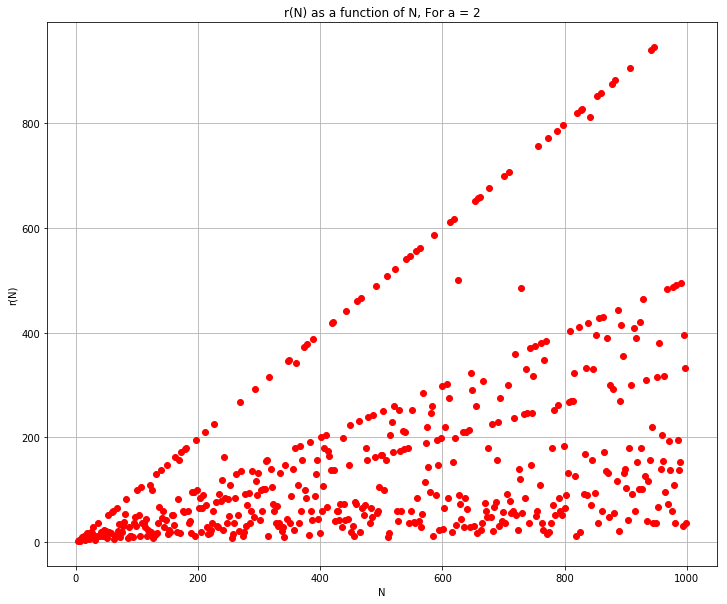

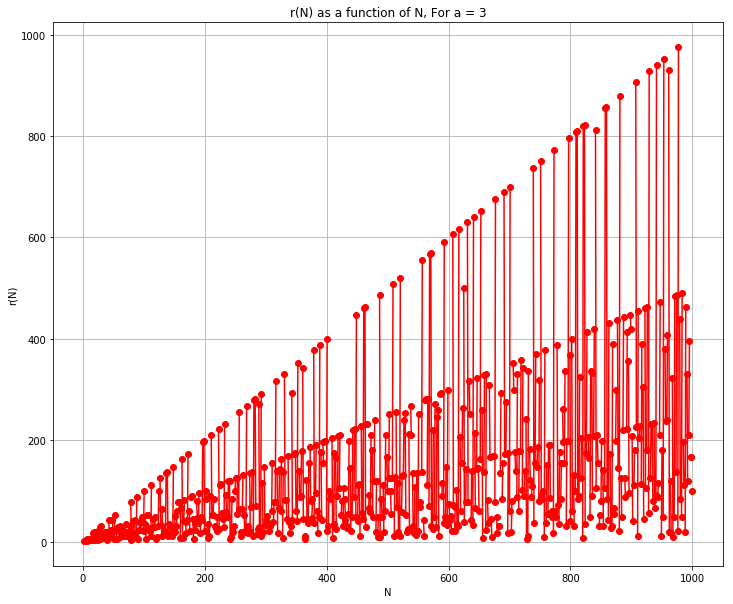

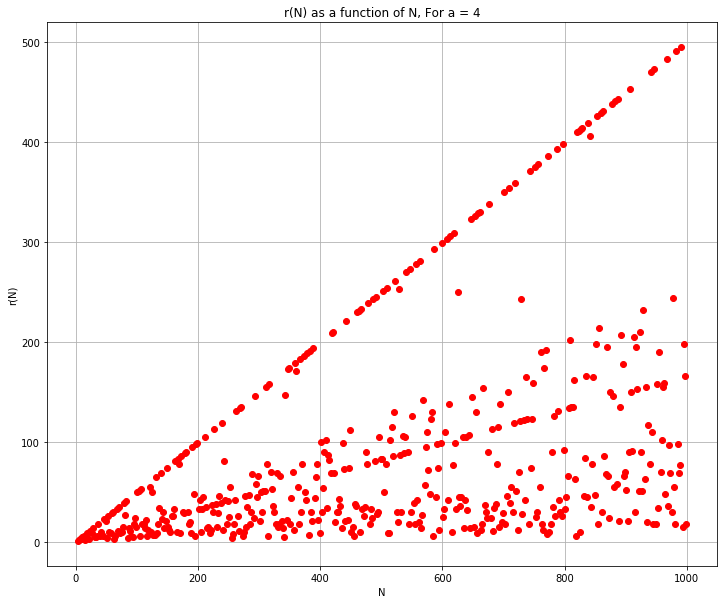

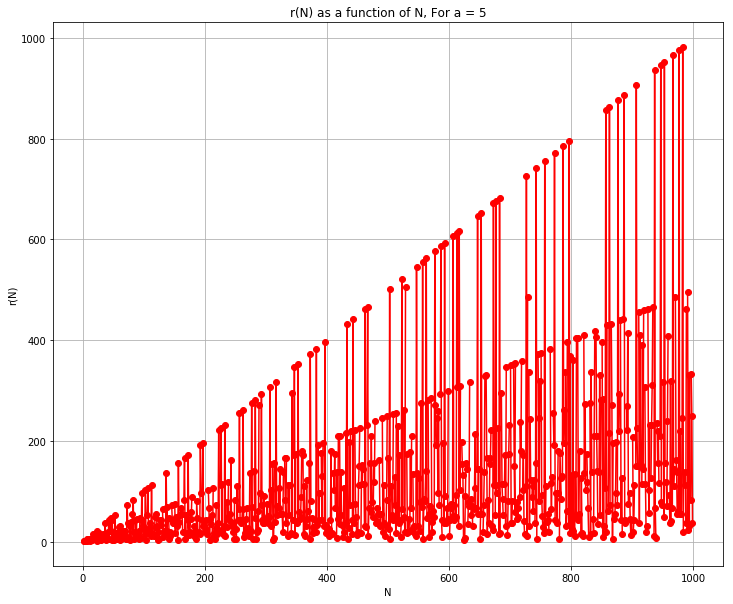

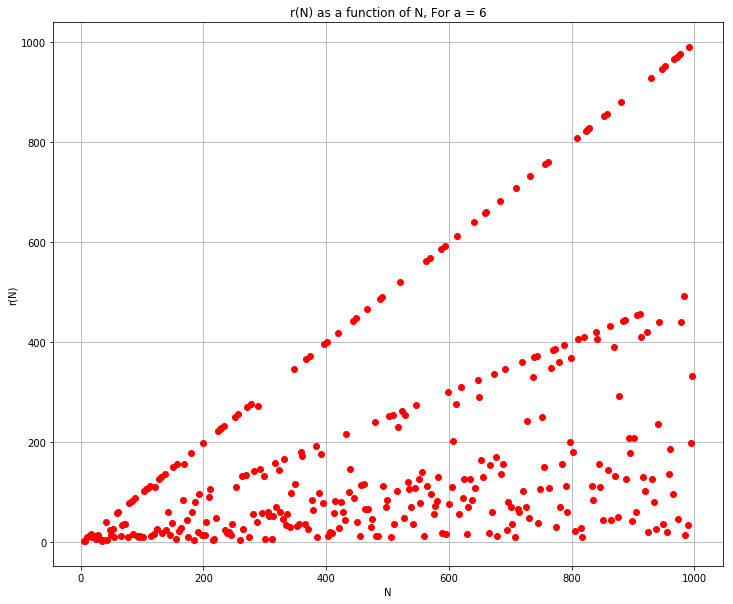

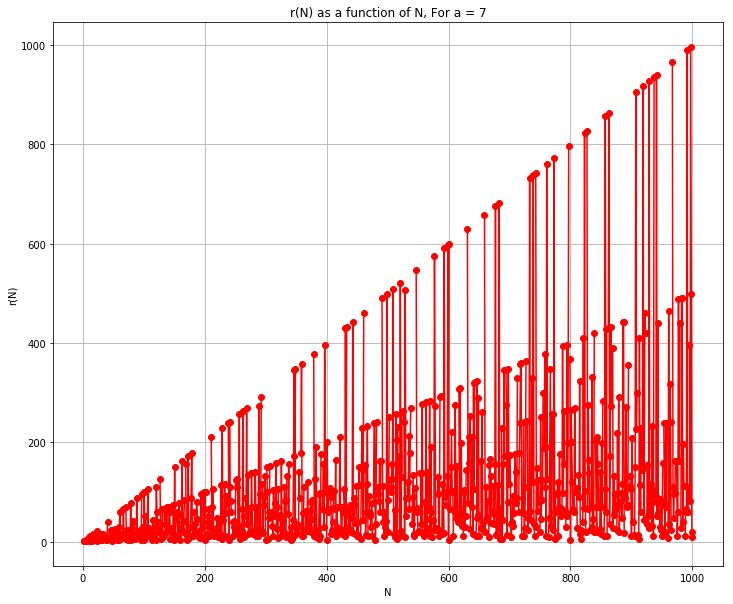

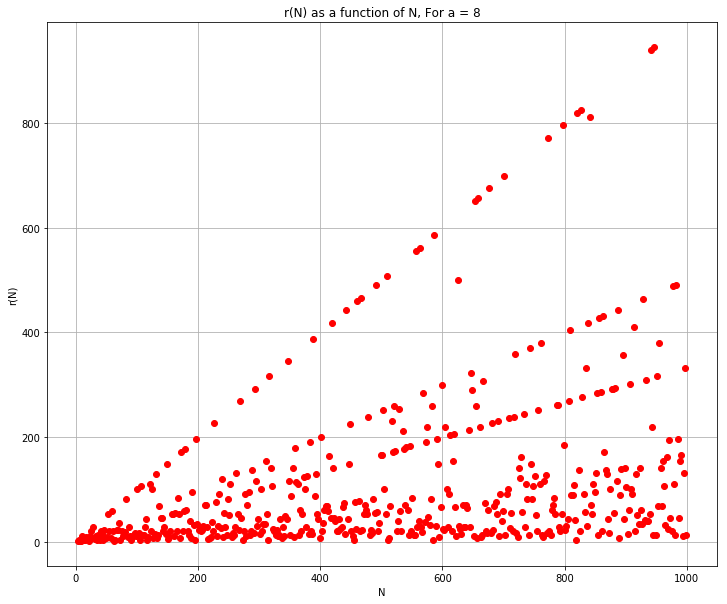

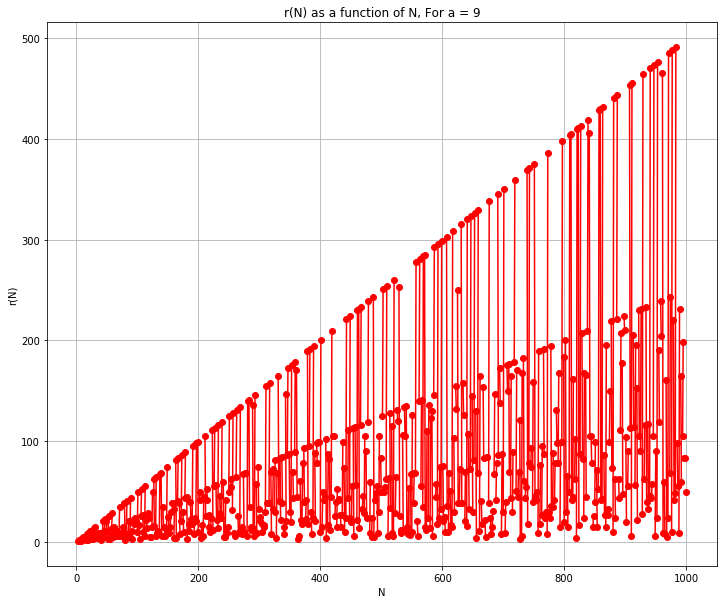

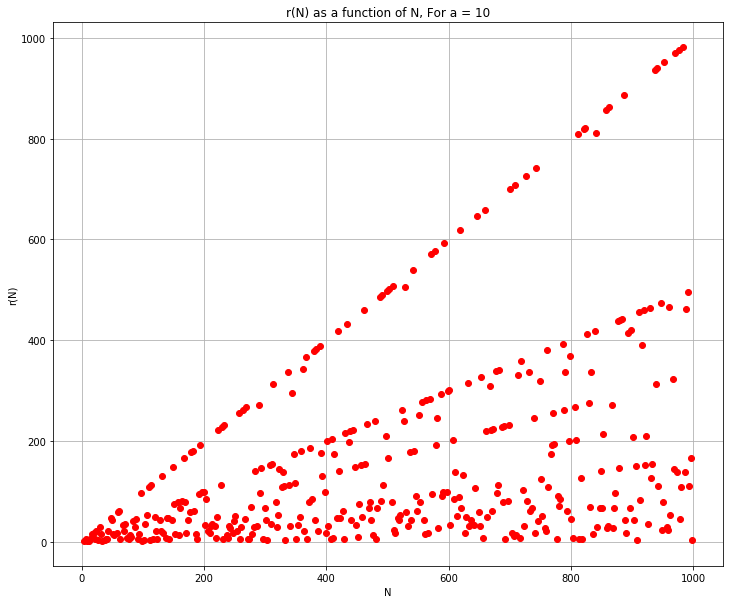

In [32]:
#aight so here we go 
# so range of N is from 1 to 1000
# find the sum of 1 mod N for that range and store it in a list

import numpy as np
import matplotlib.pylab as plt

#r value crack
#a^r mod N = 1 is the codition


"""
This function calculates the exponent modulo N.
Parameters:
  val - Input value a, for a to the power something.
  exp - The power, exponent.
  mod - The mod factor N.
"""
def expMod(val,exp,mod):
  temp = 1
  for i in range(exp):
    temp = (temp*val) % mod
  return temp

"""
This function finds the order.
Parameters:
  a - the input value a for a to the power of something.
  N - the modulus factor.
"""
def findOrder(a,N):
  #N has a specific range that must be respected 1,1000
  for r in range(1,N):
    if expMod(a,r,N) == 1: 
      return r, True
  return None,False

"""
This function finds the orders for all Ns in the 1 to 1000
range, for any input a.
Parameters:
  a - the input value a for a to the power of something.
"""
def findRsForNs(a):
  r_List = []
  N_List = []
  for N in range(1,1001):
    r = findOrder(a,N)[0]
    #print("N value is,", N, "r value is", findOrder(a,N)[0])
    r_List.append(r)
    N_List.append(N)
  return r_List, N_List

"""
This function draws the graph of order vs mod number for a
given input value to be exponentially modded a.
Parameters:
  a - the input value a for a to the power of something.
"""
def drawOrderGraph(a):
  r_List, N_List = findRsForNs(a)
  fig = plt.figure(figsize = (12,10))
  plt.plot(N_List, r_List, 'ro-')
  plt.title('r(N) as a function of N, For a = {}'.format(a))
  plt.xlabel('N')
  plt.ylabel('r(N)')
  plt.grid()
  plt.show()

#Draw the graphs.


for a in range(2, 11):
  drawOrderGraph(a)

## Pattern seen and observations made.

From the grapphs, we can see that the relationship between r(N) and N is a linear one, the larger N gets the larger r gets. However, it's not a simple linear relationship - differing Ns appear to be following different linear relationships for r(N), as most graphs appear to have multiple different distinguishable linear lines, with the bottom lines surrounded by a fuzz of other dots which just lie in between them. We don't know why this is the case, or why this only holds for most of them as opposed to some of them, but we can rule out the hypothesis that it's due to odd and even numbers because even on even a graphs, where we get (even mod even), which will never give back an order we want, we still see the exact same pattern.

# 1.3.4. Assignment 1 Problem (40 points): Integer Factorization
The order finding algorithm above is a central algorithm in integer factorization, but there is a bit more to it. Suppose you wanted to find a factor of some positive integer $N$ (if one existed). The procedure is as follows:

* Check if $N$ is even; if so, then 2 is a factor (duh);
* Check if $N$ is a power $a^b$ for integers $a$ and $b$; an
efficient algorithm for this is described below;
* For some random $a$, $2<a<N-2$, calculate the greatest common divisor of $a$ and $N$ using Euclid's algorithm; if you find one, this is the answer;
* For some random $a$, $2<a<N-2$, solve for the $r$ that solves $a^r=1$ (mod $N$);
* If $r$ is odd, go back and choose another value of $a$;
* If $r$ is even, calculate $a^{r/2}$ mod $N$; if the result is -1 (or $N-1$ mod $N$), then choose another value of $a$;
* Otherwise, calculate the greatest common divisor of $x^{r/2}\pm 1$ and $N$; if one of these gives a nontrivial factor, this is the answer;
* If you still have nothing, choose another value of $a$, and go back to step 3.

The efficient algorithm for step 2 above is as follows. If $N=a^b$,
then calculate $N^{1/b}$ for all (integer) $b$ in the range $2\leq b\leq\log N$. If the result is an integer (to within some tolerance), then you're done.

**Problem:** For each odd $N$ in the range $99900\leq N\leq 100000$, write a Python code that uses the above procedure to find a non-trivial factor for $N$. Be sure to check a few results to make sure they are correct. If you find that this algorithm is pretty inefficient, don't despair; the known inefficiency of integer factorization is the foundation of almost all of our modern cryptography. Thankfully, there is an efficient quantum algorithm!

In [0]:
import numpy as np
import math as math

In [0]:
#Preliminary algorithms used to build up the larger algorithm

def even_check(N):
  
  if N % 2 == 0:
    return True
  else:
    return False

In [0]:
#This algorithm checks if N is a power a*b for some N.
"""
Uses the fast algorithm! Yay!
"""
def isPower(N):
  sigma = 10**-5
  for b in range(3, int(np.ceil(np.log(N)))):## round up?
    value = N*(1/b)
    valueflat = int(value)
    if abs(valueflat - value) < sigma:
       return b, True
  return None, False


In [0]:
"""
This algorithm finds the GCD of two input numbers.
Parameters and key values:
  a = first number
  b = second number
  r = remainder
"""
def euclids_algorithm(a, b):
  r = a % b
  #While the remainder is greater than 0
  while r:
      a = b
      b = r
      r = a % b
  if b == 1:
    return [False,1]
  else:
    return [True,b]
    

In [0]:
#r value crack
#a^r mod N = 1 is the codition

#Calculates exponent mod, trades computational time for memory 
# storage space because we usually get overly massive numbers.
def expCalc(val,exp,modFac):
  temp = 1
  for i in range(exp):
    temp = (temp*val)%modFac
  return temp

#Finds the order of a^r == 1 mod N.
def findOrder(a,N):
  
  #can add 0 since no specific range of N
  
  for r in range(N):
    if expCalc(a,r,N) == 1: 
      return r, True
  else:
    return None,False

In [0]:
"""
This algorithm, given an input number, 
finds a relevant factor or says it's prime.
"""

def findFactor(N):

  Prime = True
  
  if even_check(N): 
    Prime = False
    return Prime,2
  
  if isPower(N)[1]:
    Prime = False
    #print("ispower trigger", isPower(N)[0])
    return Prime,isPower(N)[0]
  
  for a in range(2, N-1):
    if euclids_algorithm(a,N)[0]:
      Prime = False
      #print("euclids alg trig",euclids_algorithm(a,N)[1] )
      return Prime,euclids_algorithm(a,N)[1]
    
  for a in range(2, N-1):
    if findOrder(a,N)[1]:
      r = findOrder(a,N)[0]
      if r%2 != 0:
        pass
      elif r%2 == 0:
        if (a**(r/2)) % N == -1 or (a**(r/2)) % N == (N-1)%N:
          pass
        else:
          y = (a**(r/2)) + 1
          z = (a**(r/2)) - 1
          
          
          if z >0 and y >0: 

            if euclids_algorithm(y,N)[0]:

              #print("i triggered",euclids_algorithm(y,N)[1])



              Prime = False
              return Prime,y

            elif euclids_algorithm(z,N)[0]:

              #print("ii triggered",euclids_algorithm(z,N)[1] )

              Prime = False
              return Prime,z

            else:
              pass
  return Prime,1
      
    
      
    

In [39]:
a= 999000
b= 1000000
ORA = []
for N in range(a,b+1):
  if N%2 != 0:
    c = findFactor(N)[1]
    #print("factor for", N, "is",c )
    ORA.append([N,c])

for a,b in ORA:
  #print(a,b)
  print("factor for", a, "is",b )

factor for 999001 is 19
factor for 999003 is 3
factor for 999005 is 5
factor for 999007 is 1
factor for 999009 is 3
factor for 999011 is 13
factor for 999013 is 347
factor for 999015 is 3
factor for 999017 is 859
factor for 999019 is 7
factor for 999021 is 3
factor for 999023 is 1
factor for 999025 is 5
factor for 999027 is 3
factor for 999029 is 1
factor for 999031 is 11
factor for 999033 is 3
factor for 999035 is 5
factor for 999037 is 13
factor for 999039 is 3
factor for 999041 is 71
factor for 999043 is 1
factor for 999045 is 3
factor for 999047 is 7
factor for 999049 is 1
factor for 999051 is 3
factor for 999053 is 11
factor for 999055 is 5
factor for 999057 is 3
factor for 999059 is 107
factor for 999061 is 7
factor for 999063 is 3
factor for 999065 is 5
factor for 999067 is 1
factor for 999069 is 3
factor for 999071 is 83
factor for 999073 is 17
factor for 999075 is 3
factor for 999077 is 19
factor for 999079 is 29
factor for 999081 is 3
factor for 999083 is 1
factor for 999085 